### 1.Kiểm định giá trị trung bình<br>
- One sample T-test

In [2]:
income = [1120, 1450, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 
          9050, 8630, 8125, 7230, 3750]

Bước 1: Viết giả thuyết H0 và HA
    - H0: Thu nhập bình quân đầu người/năm của tỉnh Nghệ An bằng 5000$
    - H1: Thu nhâp bình quân đầu người/năm khác 5000$

In [3]:
sample_mean = sum(income)/len(income)
sample_mean

4658.333333333333

In [4]:
pop_mean = 5000

In [5]:
from math import sqrt
s_squared = 0
for i in income:
    s_squared += (i-sample_mean)**2
s = sqrt(s_squared/len(income))
s

2478.441490578751

In [6]:
n =len(income)
n

15

In [7]:
t_calculated = (sample_mean - pop_mean)*sqrt(n)/s
t_calculated

-0.533911861540536

In [8]:
t_critical = 2.145

In [9]:
if t_calculated<= t_critical:
    print(f'Do t_calculated = {t_calculated}<t_critical = {t_critical}, \
    vậy với alpha =0.05, H0 đúng, HA sai, nghĩa là trung bình thu nhập/năm =5000$')

Do t_calculated = -0.533911861540536<t_critical = 2.145,     vậy với alpha =0.05, H0 đúng, HA sai, nghĩa là trung bình thu nhập/năm =5000$


In [10]:
import numpy as np
import scipy.stats as stats

In [11]:
income

[1120,
 1450,
 2300,
 3540,
 4120,
 4560,
 5490,
 3460,
 4750,
 2300,
 9050,
 8630,
 8125,
 7230,
 3750]

In [12]:
t_statistic, p_value = stats.ttest_1samp(a=income, popmean=5000)
print('t_statistic = ', t_statistic)
print('p_value', p_value)

t_statistic =  -0.5158078623228827
p_value 0.614037791906036


### 2. Kiểm định giá trị trung bình độc lập

Cho 2 tập dữ liệu là chiều cao của một nhóm 15 hs. Kiểm tra hai lớp có cùng chiều cao tb hay không?

In [13]:
stud_group1 = np.array([14, 15, 15, 16, 13, 14.5, 14,
                        17, 16, 14, 19, 20, 21, 15,
                        15, 16, 16, 13, 14, 12])
stud_group2 = np.array([15, 17, 14, 17, 14, 12.5, 12,
                        19, 19, 14, 17, 22, 24, 16,
                        13, 16, 13, 18, 15, 13])
var_gp1 = np.var(stud_group1)
var_gp2 = np.var(stud_group2)
print('Phương sai 1: ',var_gp1)
print('Phương sai 2: ',var_gp2)

Phương sai 1:  5.086875000000001
Phương sai 2:  9.711875000000001


In [14]:
ratio = f'{round(var_gp1/var_gp2)}:1' if var_gp1>var_gp2 else\
f'{round(var_gp2/var_gp1)}:1'
ratio

'2:1'

In [15]:
#2 sample t-test
stats.ttest_ind(a=stud_group1, b=stud_group2, equal_var=True)

Ttest_indResult(statistic=-0.6231993234428195, pvalue=0.5368762754915417)

Đọc kết quả<br>
H0 chiều cao trung bình của lớp thứ nhất bằng chiều cao trung bình của học sinh lớp thứ 2<br>
H1 chiều cao trung bình của lớp thứ nhất khác chiều cao trung bình của học sinh lớp thứ 2<br>
Vì pvalue>0.05 nên H0 đúng

### 3. Kiểm định so sánh cặp 

Cho 2 tập dữ liệu là số lít sữa mà mối con bò sữ sản xuất được trước và sau khi ăn cỏ lên men, 10 con bò thực hiên. Kiểm tra sự khác nhau về số lượng sữa tb thu được trước và sau khi thay đổi chế độ ăn

In [15]:
milk_group1 = [30,31,32,38,32,31,32,29,28,30]
milk_group2 = [30,31,34,40,35,36,34,36,28,30]
Ki

Ttest_relResult(statistic=-2.7924259052209988, pvalue=0.020970546617932826)

H0: Trung bình năng suất sữa trước và sau khi thay đổi chế độ ăn bằng nhau<br>
H1: Trung bình năng suất sữa trước và sau khi thay đổi chế độ ăn không bằng nhau<br>
    Giả sử alpha=0.05, ta thấy pvalue<alpha, do đó H0 là sai. Vì vậy với độ sai lệch là 5%, ta có đủ chứng cứ để kết luận rằng năng suất sữa trung bình trước và sau khi thay đổi chế độ ăn trong trang trại là khác nhau

# KIỂM ĐỊNH TƯƠNG QUAN

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from math import sqrt

In [5]:
weight = [3.63, 3.02, 3.15, 3.42, 3.59, 2.87, 3.03, 3.25, 3.36, 3.3]
length = [53.1, 49.7, 48.4, 54.2, 54.9, 43.7, 47.2, 45.2, 54.4, 50.4]

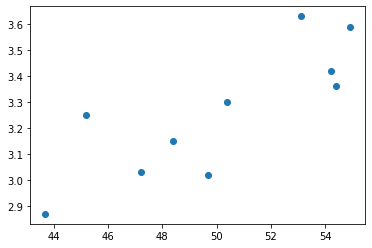

In [6]:
plt.scatter(x= length, y=weight)
plt.show()
#có thể có tương quan, xu hướng là đường thẳng

In [7]:
w_mean = sum(weight)/len(weight)
ls_mean = sum(length)/len(length)
ts = 0
for i in range(len(weight)):
    ts+=(weight[i] - w_mean)*(length[i] - ls_mean)
ts

7.286599999999996

In [8]:
ms1 = 0
ms2 = 0
for i in range(len(weight)):
    ms1 += (weight[i] - w_mean)**2
    ms2 += (length[i] - ls_mean)**2
ms = sqrt(ms1*ms2)
ms

8.957517656136655

In [9]:
r = ts/ms
r

0.8134619745915946

In [10]:
#=> r>0 và gần 1 có thể kết luận chiều dài và cân nặng của trẻ sơ sinh có mối quan hệ chặt chẽ

In [11]:
r, pvalue = pearsonr(length, weight)
print('r = ', r)
print('pvalue = ', pvalue)

r =  0.8134619745915945
pvalue =  0.00420116230004526


In [12]:
# pvalue<ampha (0.05) =>n bác bỏ H0 tức r khác 0

In [13]:
data = pd.read_csv(r'C:\Users\HP\Pandas\Untitled Folder\gene_expression.csv')
data

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G91,G92,G93,G94,G95,G96,G97,G98,G99,G100
0,0.096999,0.227366,0.431403,0.350564,0.614166,0.037278,0.608806,0.402018,0.024301,0.534258,...,0.520794,0.348856,0.648020,0.460299,0.422432,0.640388,0.238413,0.651695,0.536379,0.640927
1,0.140357,0.116043,0.498218,0.286252,0.708196,0.037699,0.645638,0.447637,0.031831,0.444297,...,0.609565,0.446938,0.655062,0.370700,0.522416,0.594598,0.209250,0.590257,0.561454,0.548147
2,0.075864,0.215462,0.245413,0.263025,0.695526,0.057789,0.659812,0.423609,0.005288,0.504874,...,0.720783,0.311021,0.637153,0.415287,0.405801,0.523387,0.278230,0.551977,0.588909,0.571148
3,0.081394,0.193503,0.561137,0.133510,0.657569,0.053319,0.534083,0.415155,0.010994,0.408166,...,0.670272,0.498790,0.549552,0.368304,0.392148,0.643276,0.351833,0.681212,0.554729,0.498315
4,0.146972,0.019467,0.520126,0.200362,0.289476,0.146236,0.522055,0.325684,0.009394,0.345423,...,0.656710,0.488208,0.530460,0.392846,0.365890,0.637134,0.240219,0.672030,0.520975,0.643914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.136612,0.218060,0.410735,0.309124,0.623771,0.057232,0.758860,0.430003,0.002582,0.463476,...,0.702393,0.469732,0.639036,0.406945,0.464915,0.352919,0.368327,0.645155,0.459091,0.582123
96,0.181643,0.254944,0.502419,0.445739,0.604940,0.070491,0.521393,0.399001,0.007459,0.497652,...,0.678336,0.351175,0.651234,0.448695,0.483983,0.610818,0.143644,0.564751,0.593970,0.798616
97,0.086596,0.248284,0.417322,0.325038,0.642527,0.050735,0.553526,0.410098,0.044201,0.425274,...,0.585763,0.481626,0.624413,0.323185,0.538718,0.611075,0.256141,0.455464,0.264548,0.557122
98,0.154695,0.240120,0.572381,0.305699,0.612217,0.034965,0.692328,0.418754,0.026105,0.553897,...,0.551415,0.451893,0.601532,0.403350,0.589157,0.586016,0.301276,0.662294,0.233315,0.577539


In [14]:
data.corr()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G91,G92,G93,G94,G95,G96,G97,G98,G99,G100
G1,1.000000,0.169975,0.109846,0.231553,-0.087381,-0.064209,-0.041415,0.142555,0.002129,-0.110972,...,0.038920,-0.077716,0.006610,0.077009,0.118549,0.021550,0.040970,0.002660,0.074044,-0.032659
G2,0.169975,1.000000,0.066510,0.243397,0.304204,-0.281620,0.025087,0.156830,0.268010,0.042149,...,-0.086019,-0.241694,0.043114,0.049519,0.221629,-0.084805,0.107109,0.113384,0.163949,0.079985
G3,0.109846,0.066510,1.000000,-0.152140,-0.041249,0.015172,-0.069908,-0.017355,-0.085911,-0.075624,...,-0.270581,-0.111771,-0.050123,-0.076612,-0.102273,0.009324,0.009409,0.047319,0.009729,0.012087
G4,0.231553,0.243397,-0.152140,1.000000,0.130446,-0.176197,-0.101741,0.102331,0.163635,0.054257,...,0.113405,0.022586,0.064802,-0.028010,0.041314,-0.006162,-0.091162,-0.022534,0.112366,0.048461
G5,-0.087381,0.304204,-0.041249,0.130446,1.000000,-0.300190,0.106845,0.114810,0.170687,0.196573,...,-0.067292,0.034273,0.106562,-0.036855,0.095098,-0.045486,-0.020867,0.135653,-0.000613,-0.019104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G96,0.021550,-0.084805,0.009324,-0.006162,-0.045486,-0.094907,-0.120065,-0.192870,0.000377,-0.072231,...,0.108706,0.226262,-0.034407,0.006273,-0.111574,1.000000,-0.124736,-0.017425,0.161821,0.112051
G97,0.040970,0.107109,0.009409,-0.091162,-0.020867,-0.055258,0.035858,0.134671,-0.035127,-0.058800,...,0.141618,-0.035408,0.090045,0.065052,0.086067,-0.124736,1.000000,0.139953,0.067760,-0.189140
G98,0.002660,0.113384,0.047319,-0.022534,0.135653,-0.029765,-0.045836,0.046743,0.039520,0.154447,...,-0.108256,0.117021,0.044302,0.032307,0.080608,-0.017425,0.139953,1.000000,0.202553,0.094383
G99,0.074044,0.163949,0.009729,0.112366,-0.000613,-0.083346,-0.127955,0.010937,-0.053368,-0.065698,...,0.125972,-0.039583,0.112466,0.186887,-0.166466,0.161821,0.067760,0.202553,1.000000,0.178887


In [15]:
for i in range(len(data.columns)):
    r,pvalue = pearsonr(data.iloc[:,99], data.iloc[:, i])
#     if r==1: 
#         continue
    if r>0.8:
        print(f'{data.columns[1]} and {data.columns[i]} have a relation')
        print('Correlation coefficient = ', r)
        print('pvalue = ', pvalue)
        break


G2 and G100 have a relation
Correlation coefficient =  1.0
pvalue =  0.0


In [16]:
r = []
for i in range(1,101, 1):
    for j in range(1,101, 1):
        if i==j:
            continue
        r_coef, pv = pearsonr(data[f'G{i}'], data[f'G{j}'])
        if r_coef>=0.7:
            r.append(f'G{i} - G{j}')
r

['G11 - G15', 'G15 - G11', 'G61 - G74', 'G74 - G61']

In [17]:
r, pvalue = pearsonr(data['G1'], data['G2'])
r

0.16997459082641037

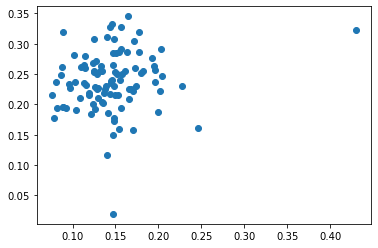

In [18]:
plt.scatter(x=data['G1'], y=data['G2'])

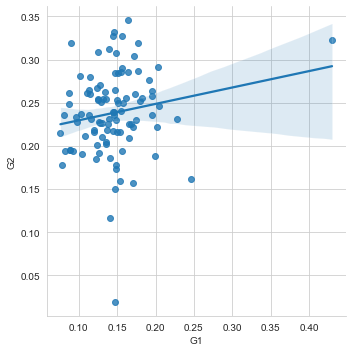

In [19]:
sns.set_style(style='whitegrid')
sns.lmplot(x='G1', y='G2', data=data)

# Kiểm định tương quan giữa 2 thuộc tính định tính

H0: Giới tính và các nhóm khảo sát không có mối tương quan<br>
H1: Có mối tương quan

In [20]:
dt= pd.DataFrame([['Male',149,13,31],['Felmale',148,24,37]],columns=['Gender','Nonsmoker','Past smoker','Current smoker'])
dt

,Gender,Nonsmoker,Past smoker,Current smoker
0,Male,149,13,31
1,Felmale,148,24,37


In [21]:
row_total = dt[dt.columns[1:]].sum(axis=1)
row_total

0    193
1    209
dtype: int64

In [22]:
col_total = dt[dt.columns[1:]].sum(axis=0)
col_total

Nonsmoker         297
Past smoker        37
Current smoker     68
dtype: int64

In [23]:
dt_total = row_total.sum()
dt_total

402

In [24]:
#Tạo dữ liệu so sánh (expected variable) for r in dt.index:
cal_val = []
for r in dt.index:
    row_val = [dt['Gender'][r]]
    for c in dt.columns[1:]:
        val = col_total[c]* row_total[r]/dt_total
        row_val.append(val)
    cal_val.append(row_val)
cal_val
    

[['Male', 142.58955223880596, 17.763681592039802, 32.646766169154226],
 ['Felmale', 154.41044776119404, 19.236318407960198, 35.353233830845774]]

In [25]:
expectation = pd.DataFrame(cal_val, columns=dt.columns)
expectation

,Gender,Nonsmoker,Past smoker,Current smoker
0,Male,142.589552,17.763682,32.646766
1,Felmale,154.410448,19.236318,35.353234


In [26]:
observed = list(dt[dt.columns[1:]].values.reshape(1,-1)[0])
observed

[149, 13, 31, 148, 24, 37]

In [27]:
observed = pd.Series(observed)
observed

0    149
1     13
2     31
3    148
4     24
5     37
dtype: int64

In [28]:
expected = list(expectation[expectation.columns[1:]].values.reshape(1,-1)[0])
expected

[142.58955223880596,
 17.763681592039802,
 32.646766169154226,
 154.41044776119404,
 19.236318407960198,
 35.353233830845774]

In [29]:
expected = pd.Series(expected)
expected

0    142.589552
1     17.763682
2     32.646766
3    154.410448
4     19.236318
5     35.353234
dtype: float64

In [30]:
cs_table = pd.DataFrame({'observed': observed, 'expected': expected})
cs_table

,observed,expected
0,149,142.589552
1,13,17.763682
2,31,32.646766
3,148,154.410448
4,24,19.236318
5,37,35.353234


In [31]:
cs_table['cs_val'] = (cs_table['observed'] - cs_table['expected'])**2/cs_table['expected']
cs_table

,observed,expected,cs_val
0,149,142.589552,0.288197
1,13,17.763682,1.277475
2,31,32.646766,0.083066
3,148,154.410448,0.266134
4,24,19.236318,1.179678
5,37,35.353234,0.076707


In [32]:
chi_square_value = cs_table['cs_val'].sum()
chi_square_value

3.171256766693158

In [33]:
dof =2
critical_value = 5.991

In [34]:
from scipy.stats import chi2_contingency

In [35]:
dt

,Gender,Nonsmoker,Past smoker,Current smoker
0,Male,149,13,31
1,Felmale,148,24,37


In [36]:
data = [dt.iloc[0][dt.columns[1:]].values, dt.iloc[1][dt.columns[1:]].values]
data

[array([149, 13, 31], dtype=object), array([148, 24, 37], dtype=object)]

In [37]:
data = [dt.iloc[0,1:].values, dt.iloc[1, 1:].values]
data

[array([149, 13, 31], dtype=object), array([148, 24, 37], dtype=object)]

In [38]:
chi, p, dof, expected = chi2_contingency(data)
#data là 1 list, chỉ lọc lấy định lượng tần suất
print('Chi-square value= ', chi)
print('pvalue= ', p)
print('degree of freedom= ', dof)
print('expected table= ', expected)

Chi-square value=  3.171256766693158
pvalue=  0.20481904779163018
degree of freedom=  2
expected table=  [[142.58955224  17.76368159  32.64676617]
 [154.41044776  19.23631841  35.35323383]]


In [39]:
#Kiểm tra mối tương quan giữa gioi tính học sinh và số học sinh đạt điểm khối A(Toán, Lý Hóa >7)
data = pd.read_csv(r'C:\Users\HP\Matplot\students.csv')
data.head(3)

,Mã học sinh,Họ tên,Ngày sinh,Giới tính,Quê quán,Toán,Lý,Hoá,Sinh,Văn,Sử,Địa,Tiếng Anh
0,20205210,Nguyễn Đức Bình,3/10/2000,Nam,Hà Nội,7.0,8.0,8.8,6.8,4.0,5.4,5.6,8.5
1,20205211,Lê Minh Hoàng,2/11/2001,Nam,Quảng Bình,5.6,7.7,6.0,7.0,6.5,6.0,3.4,9.0
2,20205212,Trần Trang Nhung,7/5/2002,Nữ,Hà Nam,4.2,6.5,5.4,8.0,7.0,7.5,4.3,5.5


In [49]:
data_new = data[(data['Toán']>7)].groupby('Giới tính')['Mã học sinh'].count()
data_new_1 = data[(data['Lý']>7)].groupby('Giới tính')['Mã học sinh'].count()
data_new_2 = data[(data['Hoá']>7)].groupby('Giới tính')['Mã học sinh'].count()
result = pd.DataFrame({'Toán': data_new, 'Lý': data_new_1, 'Hoá': data_new_2})
result

,Toán,Lý,Hoá
Giới tính,,,
Nam,5,5,5
Nữ,3,1,2


In [53]:
data = [result.iloc[0,:].values, result.iloc[1,:].values]
data

[array([5, 5, 5], dtype=int64), array([3, 1, 2], dtype=int64)]

In [54]:
chi, p, dof, expected = chi2_contingency(data)
#data là 1 list, chỉ lọc lấy định lượng tần suất
print('Chi-square value= ', chi)
print('pvalue= ', p)
print('degree of freedom= ', dof)
print('expected table= ', expected)

Chi-square value=  0.7291666666666669
pvalue=  0.6944859597510076
degree of freedom=  2
expected table=  [[5.71428571 4.28571429 5.        ]
 [2.28571429 1.71428571 2.        ]]


H0: Không có mối quan hệ giữa yếu tố giới tính và kết quả các khổi Toán, Lý, Hóa lớn hơn 7<br>
H1: Có mối quan hệ giữa yếu tố giới tính và kết quả các khổi Toán, Lý, Hóa lớn hơn 7<br>
Mức alpha được chọn là 5%<br>
pvalue>0.05, chưa thể bác bỏ H0 tức Không có mối quan hệ giữa nam nữ và kết quả các khối

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from math import sqrt

In [4]:
data =pd.read_csv('spearman_demo.csv')
data

,Height,Size
0,168,XL
1,174,XXL
2,156,M
3,154,M
4,175,XXL
5,181,XXL
6,165,L
7,175,XXL
8,172,XL
9,171,XL


In [5]:
heights = sorted(data['Height'].unique(), reverse=True)
rank_height = {heights[i]: i+ 1 for i in range(len(heights))}
rank_height

{194: 1,
 192: 2,
 189: 3,
 181: 4,
 175: 5,
 174: 6,
 173: 7,
 172: 8,
 171: 9,
 168: 10,
 165: 11,
 159: 12,
 156: 13,
 154: 14}

In [7]:
h = data['Height']
data['Height_Rank'] = h.map(rank_height)
data

,Height,Size,Height_Rank
0,168,XL,10
1,174,XXL,6
2,156,M,13
3,154,M,14
4,175,XXL,5
5,181,XXL,4
6,165,L,11
7,175,XXL,5
8,172,XL,8
9,171,XL,9


In [8]:
size_rank = [10,5.5, 14.5, 14.5, 5.5, 5.5, 12.5,5.5, 10,10, 5.5, 1.5, 5.5, 12.5, 1.5]
data['Size_Rank'] = pd.Series(size_rank)
data

,Height,Size,Height_Rank,Size_Rank
0,168,XL,10,10.0
1,174,XXL,6,5.5
2,156,M,13,14.5
3,154,M,14,14.5
4,175,XXL,5,5.5
5,181,XXL,4,5.5
6,165,L,11,12.5
7,175,XXL,5,5.5
8,172,XL,8,10.0
9,171,XL,9,10.0


In [9]:
data['d'] = abs(data['Size_Rank'] - data['Height_Rank'])
data

,Height,Size,Height_Rank,Size_Rank,d
0,168,XL,10,10.0,0.0
1,174,XXL,6,5.5,0.5
2,156,M,13,14.5,1.5
3,154,M,14,14.5,0.5
4,175,XXL,5,5.5,0.5
5,181,XXL,4,5.5,1.5
6,165,L,11,12.5,1.5
7,175,XXL,5,5.5,0.5
8,172,XL,8,10.0,2.0
9,171,XL,9,10.0,1.0


In [13]:
data['d_square']=data['d']**2

In [14]:
sum_d_square = data['d_square'].sum()
sum_d_square

30.0

In [15]:
n =15
r = 1- (6*sum_d_square)/(n*(n**2-1))
r

0.9464285714285714

In [12]:
from scipy import stats
r, pvalue = stats.spearmanr(data['Height_Rank'], data['Size_Rank'])
print('r=', r)
print('pvalue=', pvalue)

r= 0.9477622190373591
pvalue= 8.046032464072492e-08


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, stats, chi2_contingency
from math import sqrt

In [47]:
df = pd.read_csv('covid19_country_wise_latest.csv')
df.head(3)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa


Kiểm tra mối tương quan của:<br>
    - Tổng sốc ca nhiễm (Confirmed) và Tổng ca tử vong(Deaths)<br>
    - Số ca nhiễm mới và số ca tử vong mới<br>
    - Tổng số ca đang điều trị và số ca mới khỏi bệnh<br>

In [48]:
r, pvalue = pearsonr(df['Confirmed'], df['Deaths'])
print('r = ', r)
print('pvalue = ', pvalue)
#Có mối tương quan

r =  0.9346984343393536
pvalue =  4.8856399457692993e-85


In [49]:
r, pvalue = pearsonr(df['New cases'], df['New deaths'])
print('r = ', r)
print('pvalue = ', pvalue)
#Có mối tương quan

r =  0.9359465775223121
pvalue =  8.68942718357175e-86


In [56]:
r, pvalue = pearsonr(df['Active'], df['New recovered'])
print('r = ', r)
print('pvalue = ', pvalue)
#Có mối tương quan

r =  0.6738870306866048
pvalue =  4.146163682549936e-26


Kiểm tra mối tương quan giữa các châu lục với các thuộc tính Confirmed, Deaths, Recovered, Active

In [73]:
data = df.iloc[:,[1,2,3,4,-1]]
data

,Confirmed,Deaths,Recovered,Active,WHO Region
0,36263,1269,25198,9796,Eastern Mediterranean
1,4880,144,2745,1991,Europe
2,27973,1163,18837,7973,Africa
3,907,52,803,52,Europe
4,950,41,242,667,Africa
...,...,...,...,...,...
182,10621,78,3752,6791,Eastern Mediterranean
183,10,1,8,1,Africa
184,1691,483,833,375,Eastern Mediterranean
185,4552,140,2815,1597,Africa


In [74]:
data = data.groupby('WHO Region').sum()
data

,Confirmed,Deaths,Recovered,Active
WHO Region,,,,
Africa,723207,12223,440645,270339
Americas,8839286,342732,4468616,4027938
Eastern Mediterranean,1490744,38339,1201400,251005
Europe,3299523,211144,1993723,1094656
South-East Asia,1835297,41349,1156933,637015
Western Pacific,292428,8249,206770,77409


H0: Không có mối tương quan giữa các châu lục với các thuộc tính Confirmed, Deaths, Recovered, Active, mức apha 5%<br>
H1: Có mối tương quan giữa các châu lục với các thuộc tính Confirmed, Deaths, Recovered, Active

In [75]:
chi, p, dof, expected = chi2_contingency(data)
#data là 1 list, chỉ lọc lấy định lượng tần suất
print('Chi-square value= ', chi)
print('pvalue= ', p)
print('degree of freedom= ', dof)
print('expected table= ', expected)

Chi-square value=  656364.9337897515
pvalue=  0.0
degree of freedom=  15
expected table=  [[ 723207.           28700.81878367  415484.54399303  279021.6372233 ]
 [8839286.          350791.33037019 5078195.74884368 3410298.92078613]
 [1490744.           59160.8950091   856436.80308729  575146.30190362]
 [3299523.          130943.16246324 1895585.64705474 1272994.19048202]
 [1835297.           72834.64708059 1054383.5127934   708078.840126  ]
 [ 292428.           11605.14629321  168000.74422785  112822.10947894]]


In [ ]:
#Bác bỏ H0

Dùng kiểm định Spearman để kiểm định mối tương quan giữa các thuộc tính như yêu cầu 1


In [78]:
confirmed = sorted(df['Confirmed'].unique(), reverse=True)
rank_confirmed = {confirmed[i]: i+ 1 for i in range(len(confirmed))}
rank_confirmed

{4290259: 1,
 2442375: 2,
 1480073: 3,
 816680: 4,
 452529: 5,
 395489: 6,
 389717: 7,
 347923: 8,
 301708: 9,
 293606: 10,
 274289: 11,
 272421: 12,
 268934: 13,
 257101: 14,
 246286: 15,
 227019: 16,
 226225: 17,
 220352: 18,
 207112: 19,
 167416: 20,
 116458: 21,
 112585: 22,
 109597: 23,
 100303: 24,
 92482: 25,
 86783: 26,
 84648: 27,
 82040: 28,
 81161: 29,
 79395: 30,
 77058: 31,
 71181: 32,
 67251: 33,
 67096: 34,
 66428: 35,
 64379: 36,
 64156: 37,
 63985: 38,
 61442: 39,
 59177: 40,
 53413: 41,
 50838: 42,
 50299: 43,
 45902: 44,
 45309: 45,
 43402: 46,
 41180: 47,
 39741: 48,
 39482: 49,
 37390: 50,
 36263: 51,
 34477: 52,
 33624: 53,
 33296: 54,
 31142: 55,
 30446: 56,
 27973: 57,
 25892: 58,
 24141: 59,
 23154: 60,
 21209: 61,
 20887: 62,
 20558: 63,
 18752: 64,
 17975: 65,
 17110: 66,
 15988: 67,
 15841: 68,
 15655: 69,
 15516: 70,
 15303: 71,
 15035: 72,
 14547: 73,
 14203: 74,
 13761: 75,
 11424: 76,
 10621: 77,
 10498: 78,
 10213: 79,
 9764: 80,
 9690: 81,
 9132: 82,
 

In [82]:
df['Rank_confirmed'] = df.map(rank_confirmed)
df

AttributeError: 'DataFrame' object has no attribute 'map'